In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv("data/processed/train_split_80.csv")
val = pd.read_csv("data/processed/val_split_80.csv")



In [57]:
# Model
model_name = "2018-01-21_01-59-20"
model_dir = "/Users/kforest/Documents/workspace/toxiccomment/models/"
model_path = model_dir + model_name + "/"

out = pd.read_csv(model_path + "val_out.csv")

In [8]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

No handles with labels found to put in legend.


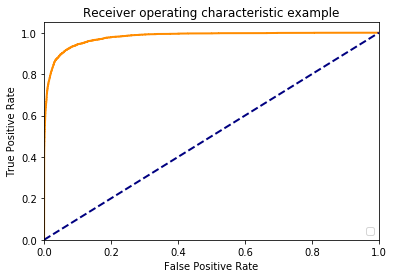

In [22]:
fpr, tpr, thresholds = roc_curve(val["toxic"], out["toxic"])
len(fpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [64]:
for i in label_cols:
    print(i)
    print(f1_score(val[i], out[i+"_"]))
    print(accuracy_score(val[i], out[i+"_"]))
    print(recall_score(val[i], out[i+"_"]))
    print(precision_score(val[i], out[i+"_"]))
    print(confusion_matrix(val[i], out[i+"_"]))


toxic
0.787791222684
0.963183456055
0.69792
0.904228855721


[[28559   231]
 [  944  2181]]
severe_toxic
0.371134020619
0.990443365189
0.286624203822
0.526315789474


[[31520    81]
 [  224    90]]
obscene
0.800763844685
0.980385398715
0.730121880441
0.886539816772


[[30031   161]
 [  465  1258]]
threat
0.483870967742
0.997994673351
0.340909090909
0.833333333333


[[31821     6]
 [   58    30]]
insult
0.696669029057
0.973178756071
0.606041923551
0.819166666667


[[30076   217]
 [  639   983]]
identity_hate
0.397196261682
0.991916026947
0.286195286195
0.648854961832


[[31572    46]
 [  212    85]]


In [66]:
class_loss = []
for i in label_cols:
    class_loss.append(log_loss(val[i], out[i]))

np.asarray(class_loss).mean()

0.05108040359637861